In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Mengimport library yang dibutuhkan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menyambungkan Notebook ke Drive agar tidak usah upload dataset lagi

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55276 entries, 0 to 55275
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x2       55276 non-null  float64
 1   x3       55276 non-null  float64
 2   x4       55276 non-null  float64
 3   x5       55276 non-null  float64
 4   x6       55276 non-null  float64
 5   x7       55276 non-null  float64
 6   x10      55276 non-null  float64
 7   x12      55276 non-null  float64
 8   x14      55276 non-null  float64
 9   x15      55276 non-null  float64
 10  x16      55276 non-null  float64
 11  x17      55276 non-null  float64
 12  x18      55276 non-null  float64
 13  x19      55276 non-null  float64
 14  x21      55276 non-null  float64
 15  x22      55276 non-null  float64
 16  x23      55276 non-null  float64
 17  x24      55276 non-null  float64
 18  x25      55276 non-null  float64
 19  x27      55276 non-null  float64
 20  x32      55276 non-null  float64
 21

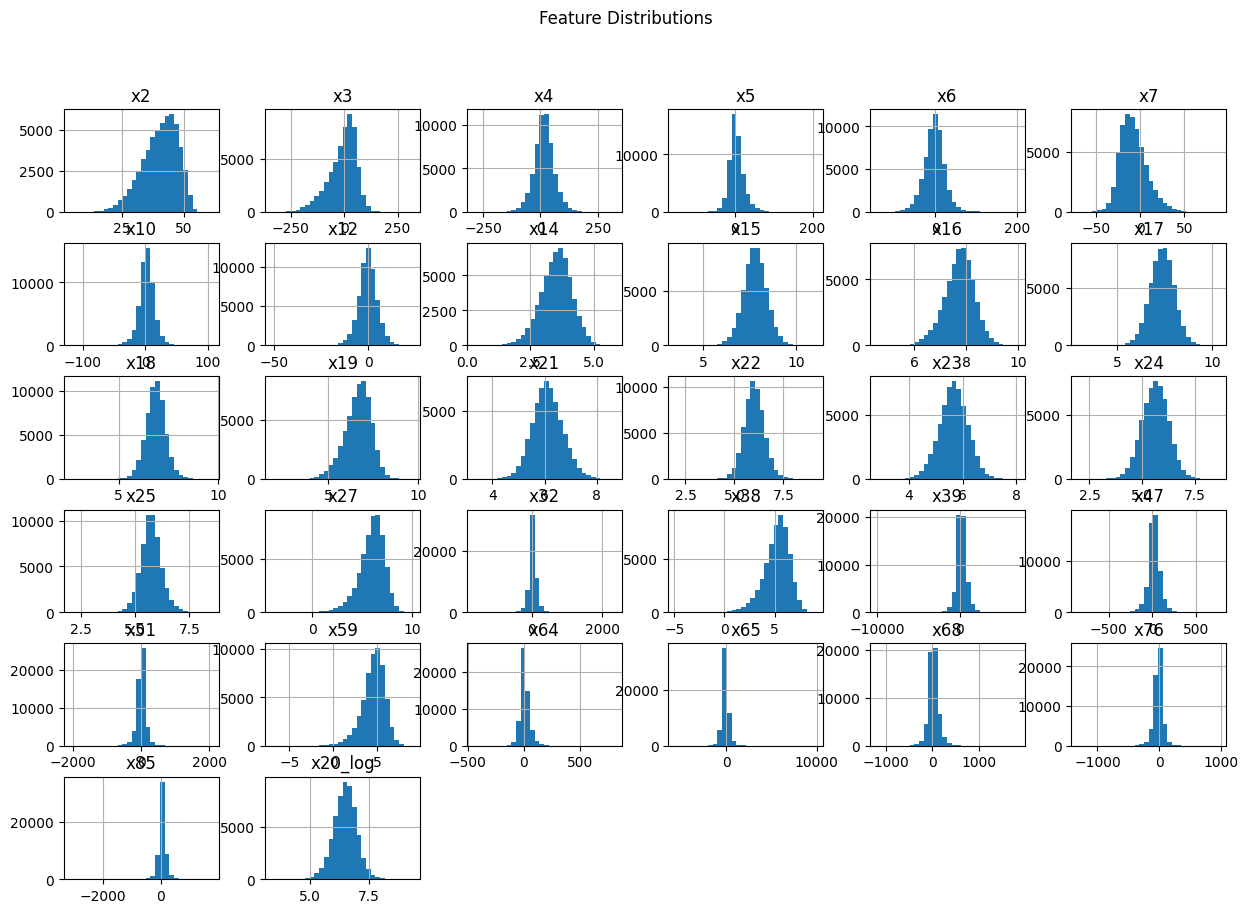

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/RegresiUTSTelkom_final.csv'
data = pd.read_csv(file_path)

# Step 1: Dataset Structure
print("Dataset Info:")
print(data.info())

# Step 2: Display a few rows
print("First few rows of the dataset:")
print(data.head())

# Step 3: Check for Missing Values
print("Missing values per column:")
print(data.isnull().sum())

# Step 4: Statistical Summary
print("Statistical summary of the dataset:")
print(data.describe())

# Step 5: Distribution of Features
data.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


Kesimpulan:
Dataset ini bersih, tidak memiliki missing values, dan sepenuhnya terdiri dari data numerik. Distribusi beberapa kolom menunjukkan variasi yang besar, yang mungkin memerlukan normalisasi atau standarisasi tergantung pada kebutuhan modeling. Data ini siap untuk eksplorasi lebih lanjut dan analisis mendalam.

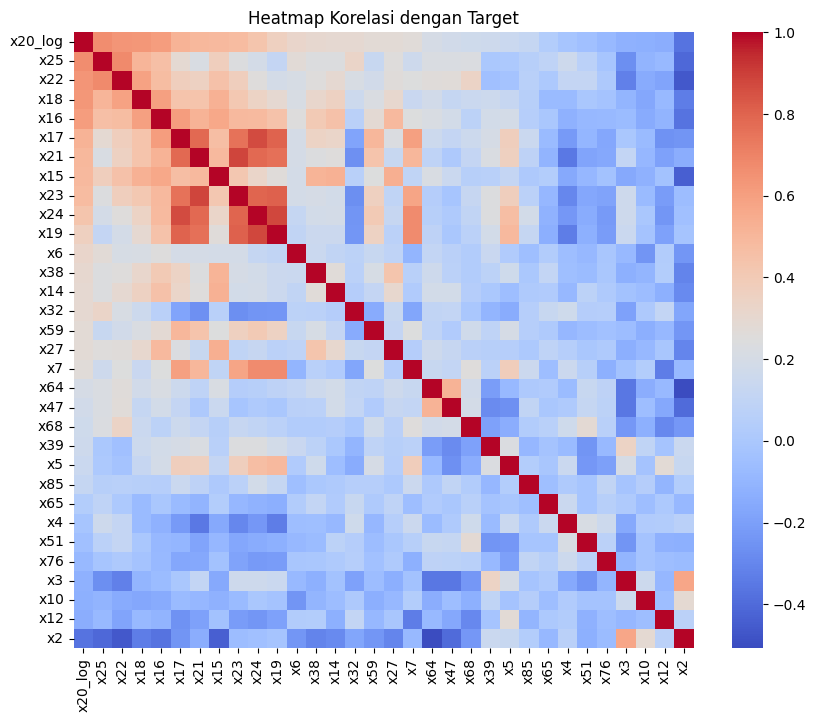

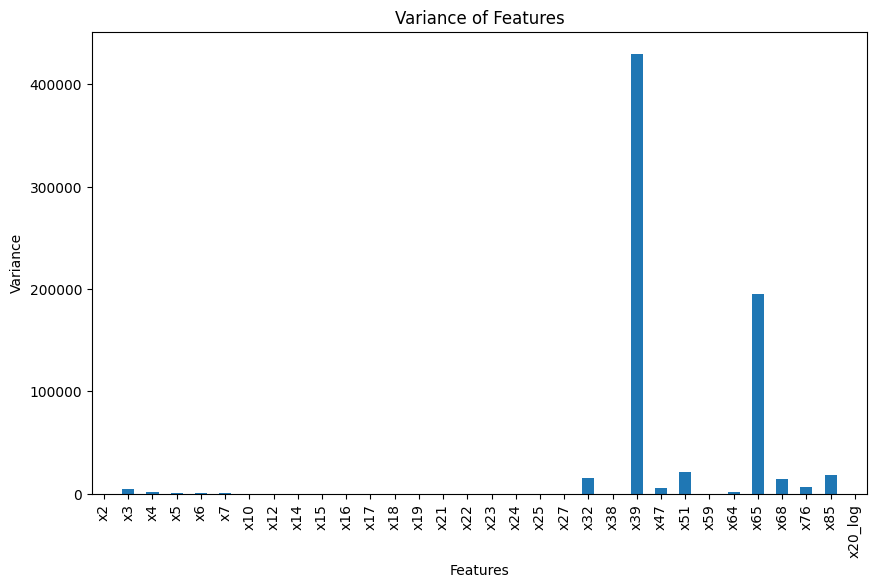

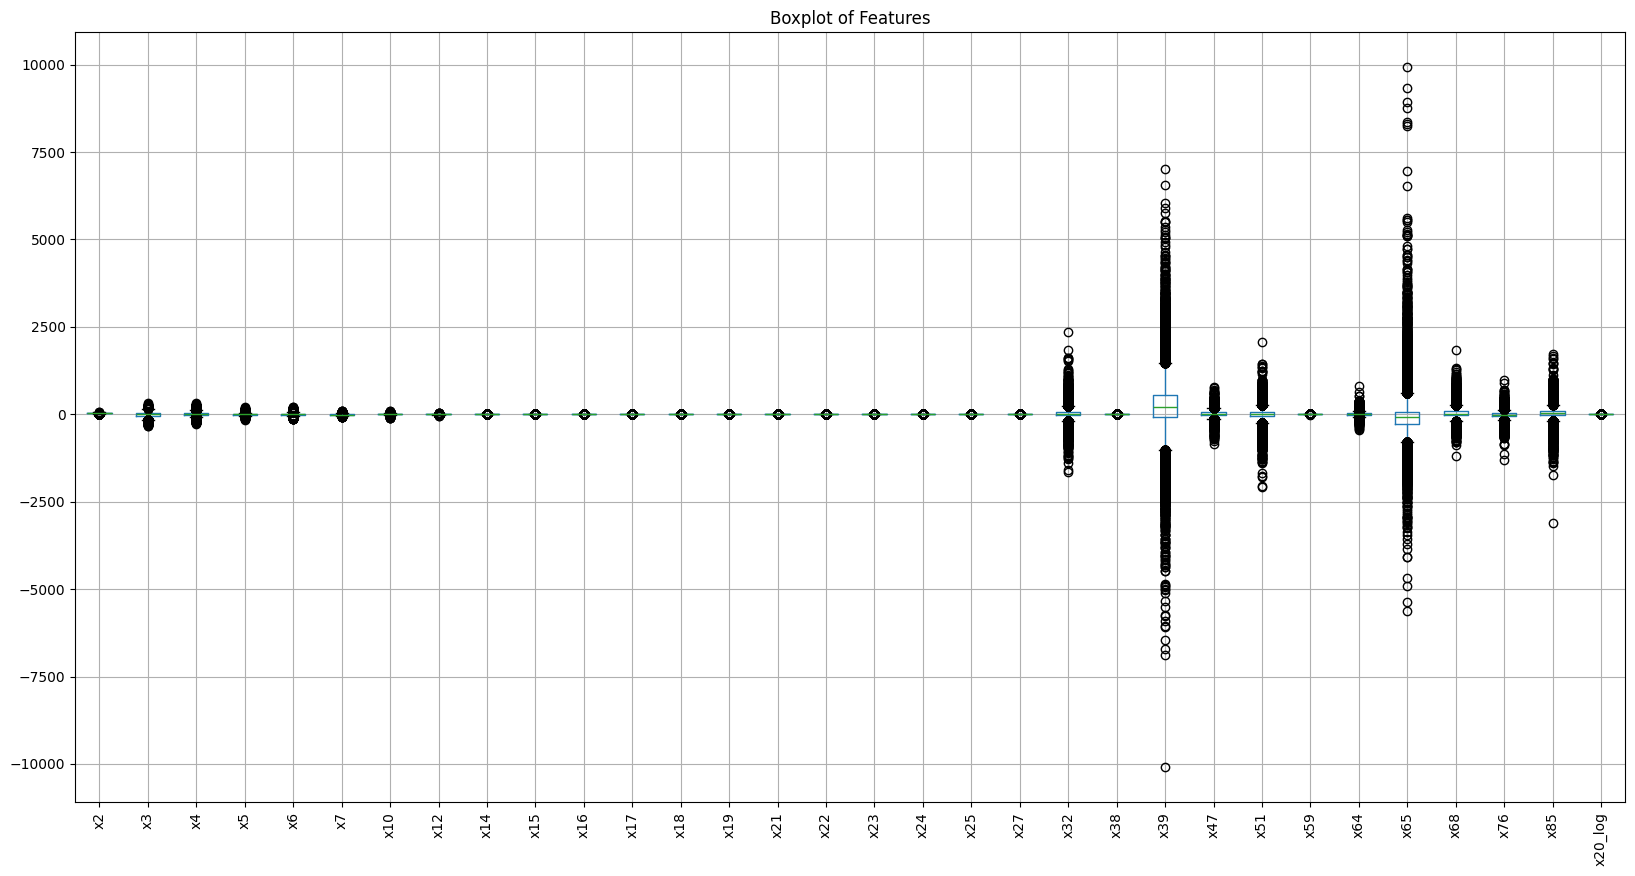

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh jika data memiliki kolom target bernama 'target'
correlation_with_target = data.corr()['x20_log'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(data[correlation_with_target.index].corr(), annot=False, cmap='coolwarm')
plt.title("Heatmap Korelasi dengan Target")
plt.show()

# Menghitung variansi setiap fitur
variances = data.var()

# Plot variansi
plt.figure(figsize=(10, 6))
variances.plot(kind='bar')
plt.title("Variance of Features")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.show()

data.boxplot(figsize=(20, 10))
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Normalisasi data
X = data.drop(columns=['x20_log'])
y = data['x20_log']
X_scaled = scaler.fit_transform(X)

Kode ini menggunakan **StandardScaler** untuk menstandarkan fitur `X` (selain `x20_log`) dengan mean 0 dan standar deviasi 1, memastikan data lebih seimbang. Target `y` adalah kolom `x20_log`, dan hasil standarisasi disimpan dalam `X_scaled`.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Kode ini membagi data fitur (`X_scaled`) dan target (`y`) menjadi data pelatihan (80%) dan pengujian (20%) dengan **train_test_split**, memastikan pembagian konsisten dengan `random_state=42`.

In [ ]:
# Pipeline untuk Polynomial Regression
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Pipeline untuk Decision Tree
tree_pipe = Pipeline([
    ('tree', DecisionTreeRegressor())
])

# Pipeline untuk k-Nearest Neighbors
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Pipeline untuk XGBoost Regression
xgb_pipe = Pipeline([
    ('xgb', XGBRegressor(objective='reg:squarederror'))
])

Kode ini membuat pipeline untuk berbagai model regresi: **Polynomial Regression** dengan fitur polinomial derajat 3, **Decision Tree** dengan batas kedalaman, **KNN** dengan standarisasi fitur, **Random Forest** dengan 100 pohon, dan **Gradient Boosting Regression**. Pipelines mengintegrasikan preprocessing dan model secara efisien.

In [ ]:
# Define parameter grids
param_grid_poly = {'poly__degree': [2, 3]}  # Polynomial Regression degree tuning
param_grid_tree = {'tree__max_depth': [5, 10, None]}  # Decision Tree max depth tuning
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 10]}
param_grid_xgb = {'xgb__n_estimators': [100, 200], 'xgb__max_depth': [3, 5, 7]}

# Grid Search untuk masing-masing model
grid_poly = GridSearchCV(poly_pipe, param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_tree = GridSearchCV(tree_pipe, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_knn = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_xgb = GridSearchCV(xgb_pipe, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

Kode ini mendefinisikan parameter grid untuk **GridSearchCV** guna mengoptimalkan hyperparameter pada beberapa model regresi. Parameter yang disesuaikan meliputi derajat polinomial (`degree`) untuk Polynomial Regression, kedalaman maksimum (`max_depth`) untuk Decision Tree, jumlah tetangga (`n_neighbors`) untuk KNN, serta jumlah estimator (`n_estimators`) dan kedalaman maksimum untuk XGBoost. **GridSearchCV** menggunakan **5-fold cross-validation** dan **neg_mean_squared_error** sebagai metrik evaluasi, membantu menemukan kombinasi parameter terbaik untuk setiap model.

In [ ]:
# Fit setiap model
print("Training Polynomial Regression...")
grid_poly.fit(X_train, y_train)

print("Training Decision Tree...")
grid_tree.fit(X_train, y_train)

print("Training k-Nearest Neighbors...")
grid_knn.fit(X_train, y_train)

print("Training XGBoost Regression...")
grid_xgb.fit(X_train, y_train)

Training Polynomial Regression...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Decision Tree...
Training k-Nearest Neighbors...
Training XGBoost Regression...


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constraints=No...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

Melakukann Pelatihan

In [ ]:
# Function untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("\n")

    return mse, mae, r2

# Evaluasi setiap model dengan parameter terbaik
print("Best Polynomial Regression Model:")
evaluate_model(grid_poly.best_estimator_, X_test, y_test, "Polynomial Regression")

print("Best Decision Tree Model:")
evaluate_model(grid_tree.best_estimator_, X_test, y_test, "Decision Tree")

print("Best k-Nearest Neighbors Model:")
evaluate_model(grid_knn.best_estimator_, X_test, y_test, "k-Nearest Neighbors")

print("Best XGBoost Model:")
evaluate_model(grid_xgb.best_estimator_, X_test, y_test, "XGBoost Regression")

Best Polynomial Regression Model:
Polynomial Regression Performance:
Mean Squared Error (MSE): 0.0608
Mean Absolute Error (MAE): 0.1885
R^2 Score: 0.7463


Best Decision Tree Model:
Decision Tree Performance:
Mean Squared Error (MSE): 0.0785
Mean Absolute Error (MAE): 0.2149
R^2 Score: 0.6727


Best k-Nearest Neighbors Model:
k-Nearest Neighbors Performance:
Mean Squared Error (MSE): 0.0740
Mean Absolute Error (MAE): 0.2101
R^2 Score: 0.6912


Best XGBoost Model:
XGBoost Regression Performance:
Mean Squared Error (MSE): 0.0532
Mean Absolute Error (MAE): 0.1790
R^2 Score: 0.7781




(0.053205702775278495, 0.17897869897945434, 0.7781181304136143)

Hasil output menunjukkan performa terbaik dari berbagai model regresi setelah dilakukan optimasi hyperparameter. **Polynomial Regression** mencapai **MSE 0.0608**, **MAE 0.1885**, dan **R² 0.7463**, menunjukkan model ini cukup baik dalam menjelaskan variabilitas data. **Decision Tree** memiliki **MSE 0.0785**, **MAE 0.2149**, dan **R² 0.6727**, performanya lebih rendah dibandingkan Polynomial Regression. **k-Nearest Neighbors (KNN)** mencatat **MSE 0.0740**, **MAE 0.2101**, dan **R² 0.6912**, sedikit lebih baik daripada Decision Tree, tetapi masih di bawah Polynomial Regression. **XGBoost Regression** memberikan performa terbaik dengan **MSE 0.0532**, **MAE 0.1790**, dan **R² 0.7781**, menunjukkan kemampuan yang lebih kuat dalam menjelaskan data dan memprediksi target dengan akurasi lebih tinggi dibandingkan model lainnya. Secara keseluruhan, XGBoost adalah model terbaik berdasarkan metrik evaluasi.

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Helper function to calculate metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Polynomial Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
poly_param_grid = {
    'poly__degree': [2, 3],
    'model__fit_intercept': [True, False]
}
poly_grid = GridSearchCV(poly_pipeline, poly_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
poly_grid.fit(X_train, y_train)
poly_best_model = poly_grid.best_estimator_
poly_y_pred = poly_best_model.predict(X_test)
poly_mse, poly_rmse, poly_mae, poly_r2 = evaluate_model(y_test, poly_y_pred)
print("\nBest Polynomial Regression Model Metrics:")
print(f"MSE: {poly_mse:.4f}, RMSE: {poly_rmse:.4f}, MAE: {poly_mae:.4f}, R^2: {poly_r2:.4f}")

# Decision Tree
tree_param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
tree_grid.fit(X_train, y_train)
tree_best_model = tree_grid.best_estimator_
tree_y_pred = tree_best_model.predict(X_test)
tree_mse, tree_rmse, tree_mae, tree_r2 = evaluate_model(y_test, tree_y_pred)
print("\nBest Decision Tree Model Metrics:")
print(f"MSE: {tree_mse:.4f}, RMSE: {tree_rmse:.4f}, MAE: {tree_mae:.4f}, R^2: {tree_r2:.4f}")

# k-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)
knn_mse, knn_rmse, knn_mae, knn_r2 = evaluate_model(y_test, knn_y_pred)
print("\nBest k-Nearest Neighbors Model Metrics:")
print(f"MSE: {knn_mse:.4f}, RMSE: {knn_rmse:.4f}, MAE: {knn_mae:.4f}, R^2: {knn_r2:.4f}")

# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, eval_metric='rmse'), xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(y_test, xgb_y_pred)
print("\nBest XGBoost Model Metrics:")
print(f"MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R^2: {xgb_r2:.4f}")



Best Polynomial Regression Model Metrics:
MSE: 0.0608, RMSE: 0.2467, MAE: 0.1885, R^2: 0.7463

Best Decision Tree Model Metrics:
MSE: 0.0790, RMSE: 0.2811, MAE: 0.2156, R^2: 0.6705

Best k-Nearest Neighbors Model Metrics:
MSE: 0.0772, RMSE: 0.2779, MAE: 0.2140, R^2: 0.6779

Best XGBoost Model Metrics:
MSE: 0.0528, RMSE: 0.2297, MAE: 0.1783, R^2: 0.7799


Kesimpulan dari output ini menunjukkan bahwa **XGBoost Regression** memberikan performa terbaik dibandingkan model lainnya. Dengan **MSE 0.0528**, **RMSE 0.2297**, **MAE 0.1783**, dan **R² 0.7799**, XGBoost memiliki error paling rendah dan kemampuan prediktif terbaik dalam menjelaskan variabilitas data. 

**Polynomial Regression** berada di urutan kedua dengan **MSE 0.0608**, **RMSE 0.2467**, **MAE 0.1885**, dan **R² 0.7463**, menunjukkan performa yang baik tetapi tidak seakurat XGBoost. 

**k-Nearest Neighbors (KNN)** mencatat **MSE 0.0772**, **RMSE 0.2779**, **MAE 0.2140**, dan **R² 0.6779**, sedikit lebih baik dibandingkan **Decision Tree**, yang memiliki **MSE 0.0790**, **RMSE 0.2811**, **MAE 0.2156**, dan **R² 0.6705**. 

Secara keseluruhan, XGBoost adalah pilihan terbaik untuk meminimalkan error dan menghasilkan prediksi yang paling akurat.